# Classification of Variety of Rice using Convolutional Neural Network(CNN)


# Introduction  

### RiceTech Industries: Leading the Way in Rice Processing  

RiceTech Industries(imaginary) has built its reputation as a trusted leader in the global rice processing and packaging industry, supplying premium-quality rice varieties to markets worldwide. However, as demand increases, the company faces significant operational challenges. Traditional manual inspection methods are slow, prone to error, and incapable of scaling to meet growing production demands. These inefficiencies threaten product quality, customer satisfaction, and overall competitiveness.  



### Challenges  

- **Scalability**: Manual inspections struggle to meet the scale of production.  
- **Accuracy**: Misclassification of rice varieties impacts consistency and quality.  
- **Efficiency**: Labor-intensive processes increase costs and slow down operations.  



### My Role as a Data Scientist  

To tackle these pressing challenges, I have been tasked with designing an innovative, automated solution that addresses the limitations of manual methods.  



### Objective  

To replace manual rice variety classification with a cutting-edge, automated system that ensures accuracy, scalability, and efficiency, enabling RiceTech to maintain its competitive edge in the market.  



### Proposed Solution  

As a data scientist, I propose leveraging deep learning techniques, specifically **Convolutional Neural Networks (CNNs)**, to solve this problem. The solution involves:  

- **Training a CNN Model**: Using a large dataset of rice images, the CNN will be trained to identify rice varieties with high precision.  
- **Scalability**: The model will handle large-scale production with ease, ensuring consistent quality.  
- **Efficiency**: Automating the classification process will significantly reduce inspection time, lower costs, and eliminate human error.  





In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Task-01 The Data

### Overview of the Dataset  

For this project, we are utilizing two datasets **Rice MSC Dataset** & **Rice Image Dataset**, comprehensive and well-documented datasets designed for classifying rice varieties using with both image and non-image data. These datasets provide an excellent foundation for training and evaluating a deep learning model for automated classification.  

---

### Datasets Details  

**URL:**  https://www.muratkoklu.com/datasets/

- **Source**:  
  - Koklu, M., Cinar, I., & Taspinar, Y. S. (2021). Classification of rice varieties with deep learning methods. *Computers and Electronics in Agriculture, 187*, 106285.  
  - DOI: [10.1016/j.compag.2021.106285](https://doi.org/10.1016/j.compag.2021.106285)  

- **Key Characteristics**: 

  DATASET 1 (Rice MSC Dataset)

  - **Number of Instances**: 75,000 instances  
  - **Number of features**: 106 features (has 12 morphological, 4 shape and 90 color features) 
  - **Data Type**: features  or attribute
  - **Year Published**: 2021  


  DATASET 2 (Rice Image Dataset)

  - **Number of Instances**: 75,000 rice images  
  - **Number of Classes**: 5 distinct rice varieties  
  - **Data Type**: Image  
  - **Year Published**: 2021  


### Why This Dataset?  

The Rice Image Dataset is particularly suitable for this project due to the following reasons:  

- **High-Quality Data**: The dataset consists of clear, well-labeled images, making it ideal for deep learning tasks.  
- **Variety Diversity**: The dataset includes five distinct classes of rice varieties, allowing for a robust and comprehensive classification model.  
- **Scale**: With 75,000 instances of both features and Images, the dataset provides sufficient data to train and validate a high-performing Convolutional Neural Network (CNN).  
- **Relevance**: The images reflect the real-world characteristics of rice grains, ensuring that the model will generalize effectively when applied in an industrial setting.  



# TASK-02 Initial Data Analysis

##### DATASET-01 (Rice MSC Dataset)

In [ ]:


df = pd.read_excel('Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


As you can see there are more than 100 features in the first dataset. It doesnt make sense to print all the features as only first 12 morphological features are important.

Also, there is CLASS feature at the end of the dataframe used for classification in the upcoming tasks.

In [3]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4V,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,8379.197507,378.169453,161.805540,66.829335,0.886077,101.731251,0.975896,8584.862320,0.633226,2.597063,...,0.448960,111.088252,64.379443,61.461457,101.925425,66.240541,63.202088,0.341944,0.357058,0.421176
std,3119.209274,70.597008,36.461005,16.689269,0.071906,17.874070,0.007966,3189.298025,0.123795,0.968982,...,0.021736,5.904854,1.175616,2.435635,5.436861,2.159109,1.174976,0.041921,0.047139,0.043137
min,3929.000000,261.040000,96.968300,34.673000,0.627700,70.728800,0.877500,4032.000000,0.278800,1.284500,...,0.313900,82.300600,59.137900,53.653800,75.191800,58.323800,57.363400,0.159700,0.169000,0.191800
25%,6259.000000,316.431500,132.623500,49.650200,0.846100,89.270400,0.970900,6385.000000,0.561000,1.876100,...,0.434200,106.632900,63.883800,59.465575,97.834400,64.842000,63.052800,0.309900,0.320900,0.391200
50%,7345.000000,351.261000,149.343950,69.183900,0.885600,96.705500,0.976400,7532.000000,0.655800,2.153200,...,0.451600,110.770700,64.419350,61.424400,101.683700,66.291600,63.522050,0.340100,0.353300,0.424200
75%,8901.000000,444.986000,197.462025,75.814125,0.950800,106.457100,0.982200,9153.000000,0.727800,3.228700,...,0.466100,115.065075,65.174200,63.076825,105.592450,68.011800,63.734000,0.370300,0.387900,0.454700
max,21019.000000,593.698000,255.647200,113.441100,0.986800,163.591600,0.992100,21633.000000,0.901700,6.179500,...,0.495100,126.265100,67.459000,70.284000,116.287300,73.424700,66.539100,0.463900,0.488600,0.530200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 107 entries, AREA to CLASS
dtypes: float64(95), int64(11), object(1)
memory usage: 61.2+ MB


In [5]:
df.shape

(75000, 107)

The data set has in total 75 rows, 107 columns (106 attributes and 1 colum "CLASS")

In [6]:
df.CLASS.value_counts()

CLASS
Basmati      15000
Arborio      15000
Jasmine      15000
Ipsala       15000
Karacadag    15000
Name: count, dtype: int64

In [7]:
df.describe(include=[object])

,CLASS
count,75000
unique,5
top,Basmati
freq,15000


##### Dataset 2 (Rice Image Dataset)

In [8]:
main_dir = "Rice_Image_Dataset/Rice_Image_Dataset"

image_paths = []
labels = []

# Iterate through each subdirectory
for label in os.listdir(main_dir):
    subdir_path = os.path.join(main_dir, label)
    if os.path.isdir(subdir_path):  # Ensure it's a directory
        for file in os.listdir(subdir_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filter for image files
                image_paths.append(os.path.join(subdir_path, file))
                labels.append(label)

# Create a DataFrame
df_img = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Display the DataFrame
print(df_img.head())


                                          image_path    label
0  Rice_Image_Dataset/Rice_Image_Dataset\Arborio\...  Arborio
1  Rice_Image_Dataset/Rice_Image_Dataset\Arborio\...  Arborio
2  Rice_Image_Dataset/Rice_Image_Dataset\Arborio\...  Arborio
3  Rice_Image_Dataset/Rice_Image_Dataset\Arborio\...  Arborio
4  Rice_Image_Dataset/Rice_Image_Dataset\Arborio\...  Arborio


In [9]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  75000 non-null  object
 1   label       75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


# Task-03 Preprocessing

Lets preprocess our data using various techniques.

In [10]:
df.isna()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df = df.dropna()

In [12]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

(74400, 107)

In [13]:
df.reset_index(inplace=True)

In [ ]:
# standardizing dataframe for better evaluation ahead

scaler = StandardScaler()
scaler.fit(df.drop("CLASS",axis=1))
X = scaler.transform(df.drop("CLASS",axis=1))
encoder = LabelEncoder()
encoder.fit(df["CLASS"])
y = encoder.transform(df["CLASS"])


# Exploratory Data Analysis

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_6340\4200124852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.CLASS,palette="viridis")


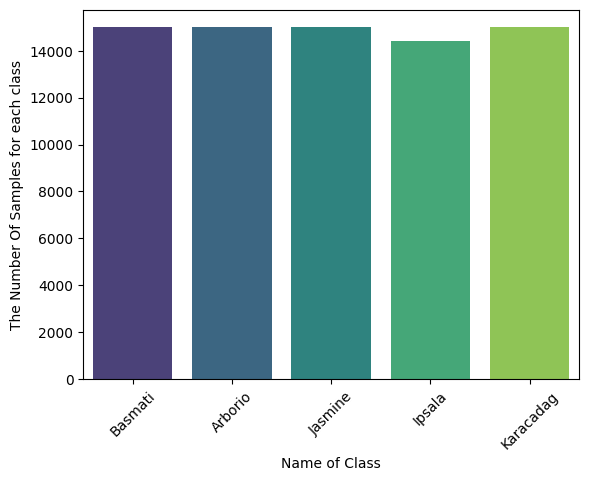

In [15]:
# plot the classes
ax = sns.countplot(x=df.CLASS,palette="viridis")
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")
plt.xticks(rotation=45)
plt.show()


We can see in the above plot that Ipsala rice had some impurities in the dataset hinting towards null values or duplicate values which are now removed. Overall the dataset looks pretty much evenly distributed. lets do some more analysis on the features.

<Axes: >

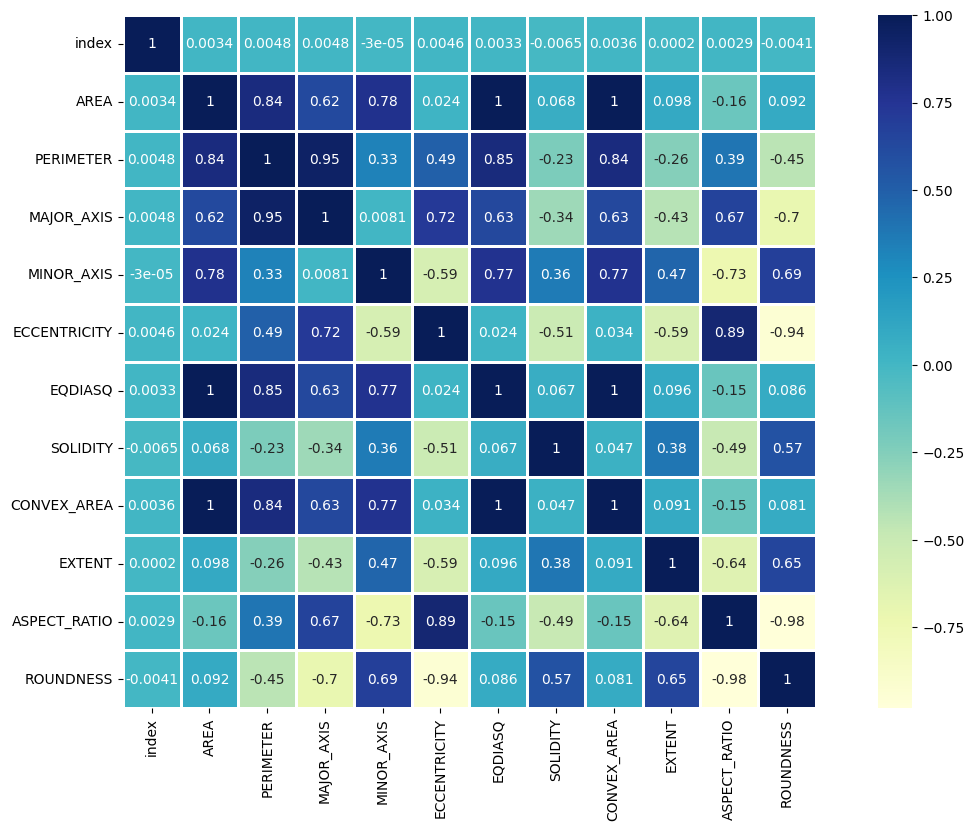

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.iloc[:,:12].corr(), cmap="YlGnBu",annot=True, fmt=".2g", linewidths = 1, square= True)

The above plot shows the correlation matrix of first 12 features. There are alot of pair of features which are important for the classification of rice by looking at their weights. for eg. features like Convex-Area vs Area vs EQDIASQ goes hand in hand 

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_6340\782603313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CLASS", y=df.columns[i], data=df, palette="Set1")
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_6340\782603313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CLASS", y=df.columns[i], data=df, palette="Set1")
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_6340\782603313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CLASS", y=df.columns[i], data=df, palette="Set1")
C:\Users\Rohit Kumar\AppData\Local\Te

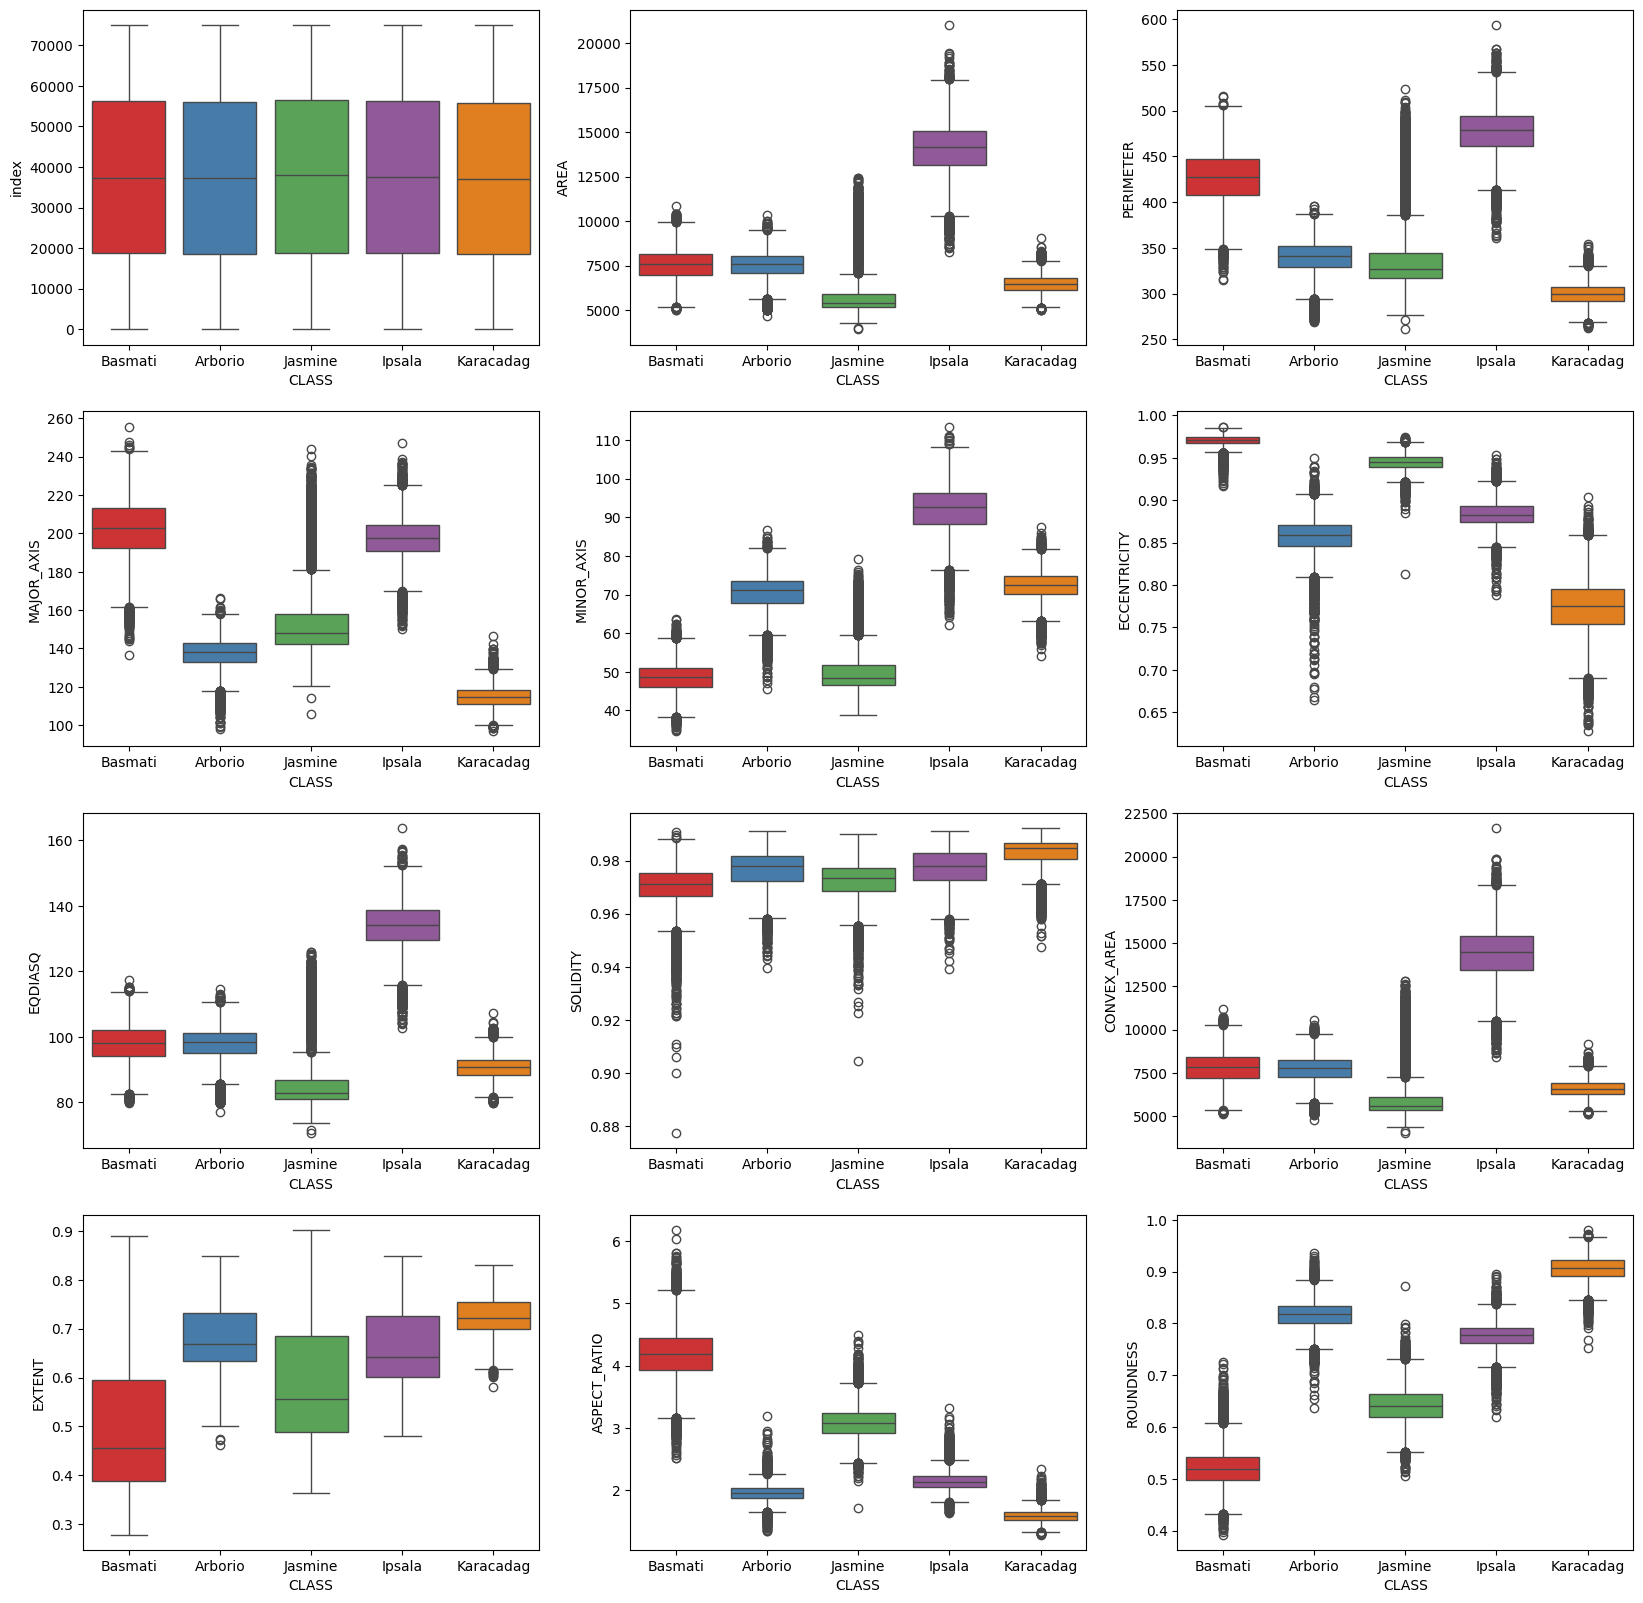

In [17]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x="CLASS", y=df.columns[i], data=df, palette="Set1")
plt.show()

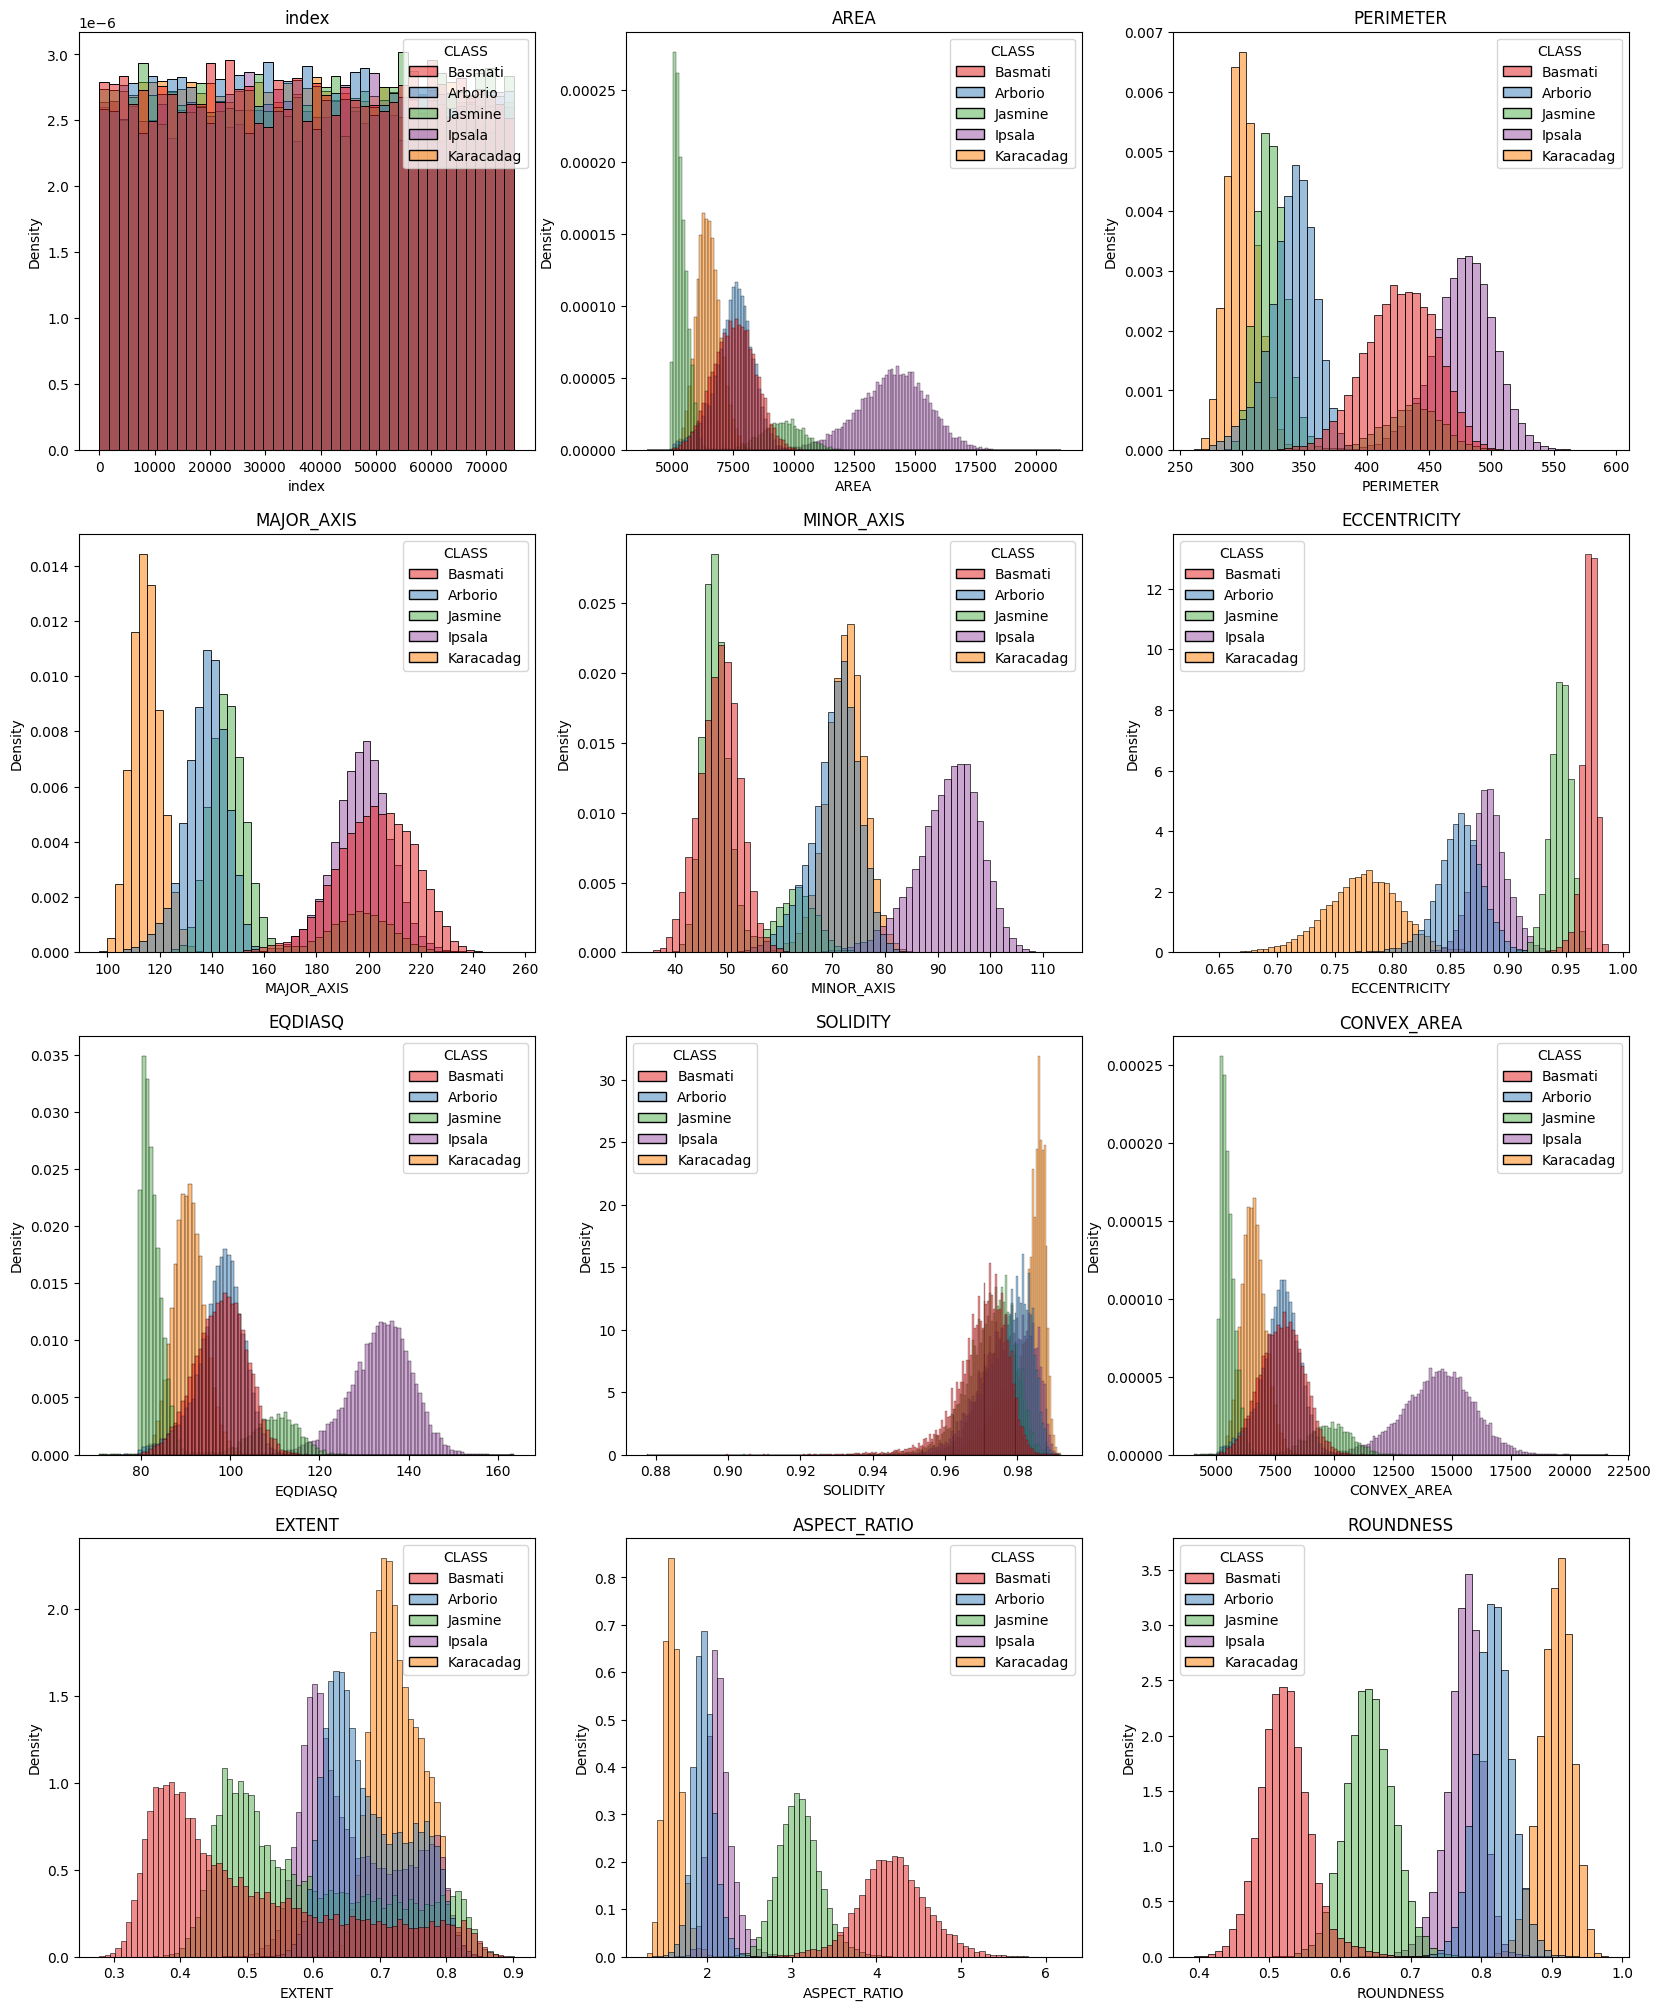

In [18]:
plt.figure(figsize=(20,25))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=df, x=df.columns[i],hue="CLASS", stat="density", palette="Set1")
    plt.title(df.columns[i])
plt.show()

# Baselines

### Lets pick our Evaluation metrices:

**Accuracy:** Since the dataset has balanced classes (15,000 rows per class), accuracy is a meaningful metric to evaluate the overall correctness of predictions.

**F1-Score:** For multi-class classification, the F1-score (macro) evaluates the balance between precision and recall for each class. It's useful for understanding the performance in predicting all classes equally well.

### Lets pick our heuristic Baseline Model:



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.80)

In [20]:
# Simple heuristic: predict the first class for all rows
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

majority_class = 0  # Assume Class 0 is the majority
y_pred_heuristic = np.full_like(y_test, majority_class)

# Evaluate the heuristic
heuristic_accuracy = accuracy_score(y_test, y_pred_heuristic)
heuristic_f1 = f1_score(y_test, y_pred_heuristic, average='macro')

print(f"Heuristic Baseline Accuracy: {heuristic_accuracy:.2f}")
print(f"Heuristic Baseline F1-Score (macro): {heuristic_f1:.2f}")

Heuristic Baseline Accuracy: 0.20
Heuristic Baseline F1-Score (macro): 0.07


In [21]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred, average='macro')

print("=== Decision Tree Classifier Baseline ===")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"F1-Score (macro): {dt_f1:.2f}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12062
           1       0.99      0.99      0.99     11990
           2       1.00      1.00      1.00     11518
           3       0.99      0.99      0.99     11992
           4       1.00      1.00      1.00     11958

    accuracy                           0.99     59520
   macro avg       0.99      0.99      0.99     59520
weighted avg       0.99      0.99      0.99     59520

=== Decision Tree Classifier Baseline ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12062
           1       0.99      0.99      0.99     11990
           2       1.00      1.00      1.00     11518
           3       0.99      0.99      0.99     11992
           4       1.00      1.00      1.00     11958

    accuracy                           0.99     59520
   macro avg       0.99      0.99      0.99     59520
weighted avg       0.99      0.99  

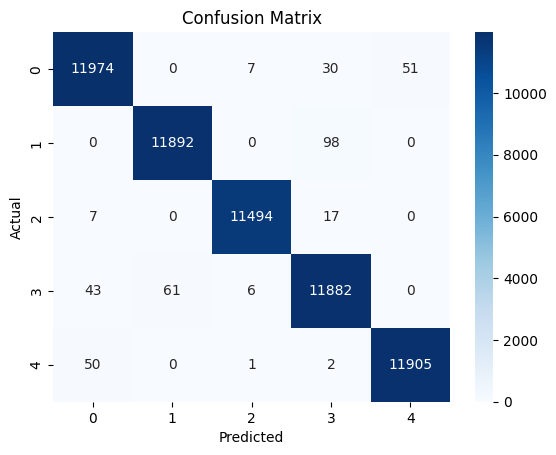

In [22]:
cm = confusion_matrix( y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

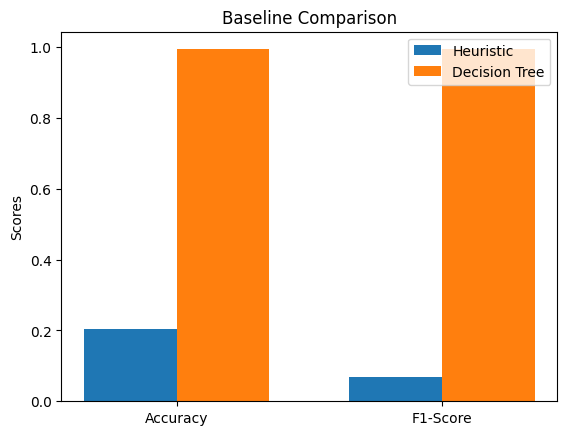

In [ ]:
# Visualizing performance comparison
metrics = ['Accuracy', 'F1-Score']
heuristic_scores = [heuristic_accuracy, heuristic_f1]
dt_scores = [dt_accuracy, dt_f1]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, heuristic_scores, width, label='Heuristic')
plt.bar(x + width/2, dt_scores, width, label='Decision Tree')

plt.ylabel('Scores')
plt.title('Baseline Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.show()

we can see clearly that using a baseline indeed helps to evaluate our model better. In this case the model performed really well with an accuracy of 99% and very good F1 score of 99%. This also proves that choosing the DecisonTreeClassifier was indeed a right choice for creating the model using Dataset-1. 

Now lets move on to Deep learning.

# Deep Learning

For deep learning steps we will use Dataset 2 which is of Rice Image. Lets first convert the dataset into a dataframe containing two features  Label and Image_path.

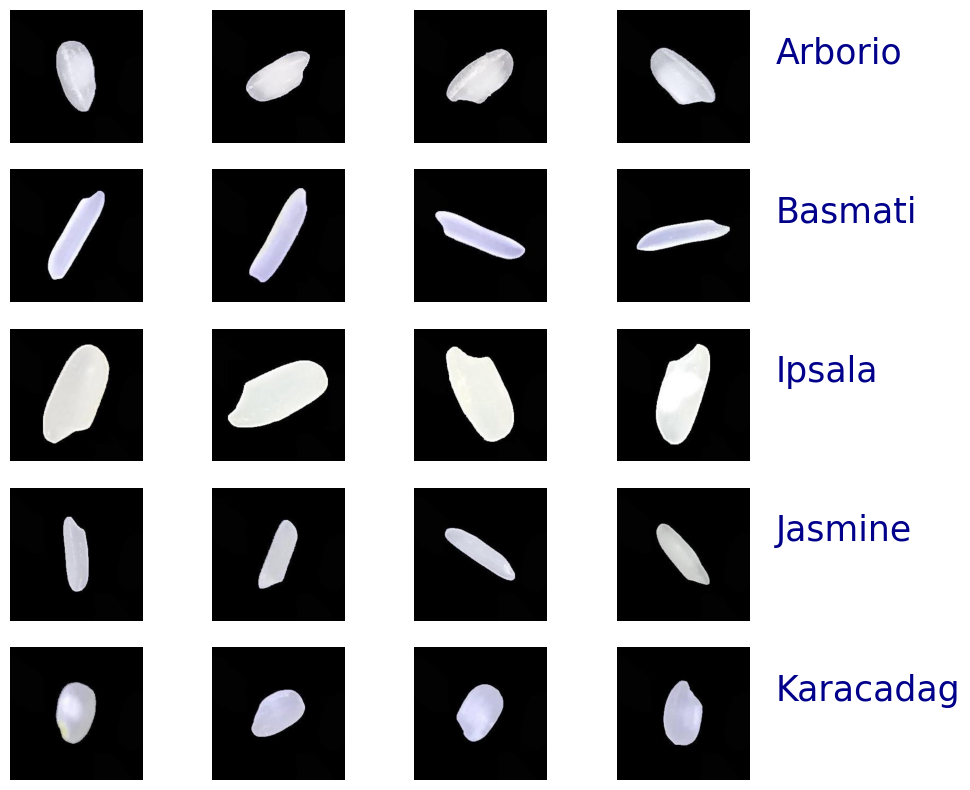

In [24]:
from matplotlib.gridspec import GridSpec

# Create figure and grid of subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(5, 4, figure=fig)

for i, category in enumerate(df_img['label'].unique()):
    filepaths = df_img[df_img['label'] == category]['image_path'].values
    np.random.shuffle(filepaths) 
    
    filepaths = filepaths[:4]
    
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()


### Splitting Data into Train and Test (80:20)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_img['image_path'], df_img['label'], test_size=0.2, random_state=42)
df_train = pd.DataFrame({'image_path': X_train, 'label': y_train})
df_test = pd.DataFrame({'image_path': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#### Introduction to Convolutional Neural Networks (CNNs)

A Convolutional Neural Network (CNN) is a specialized type of artificial neural network designed to process and analyze data that has a spatial or grid-like structure, such as images. CNNs are widely used in computer vision tasks, including image classification, object detection, and facial recognition.

 **Why CNNs Are Used**

### 1. **Automatic Feature Extraction**
- CNNs can automatically learn and extract relevant features (like edges, textures, and patterns) from raw pixel data.
- Eliminates the need for manual feature engineering.

### 2. **Efficient and Scalable**
- CNNs are computationally efficient for processing high-dimensional data (e.g., images) because they reduce the number of parameters compared to fully connected networks.

---



#### PREPROCESSING using ImageDataGenerator

Below we used ImageDataGenerator to preprocess images. This generator:

* Rescaled pixel values: Normalized images by scaling pixel values to the range [0, 1].
* Dynamically loaded images: Generated image batches on-the-fly during training to save memory.
* Image size was standardized to 128x128 pixels for uniformity.

In [26]:
# Create ImageDataGenerators for training and testing with preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow images from the dataframe for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train, 
    x_col='image_path', 
    y_col='label', 
    target_size=(128, 128),  # Resize images to (128, 128)
    batch_size=32, 
    class_mode='sparse'  # Use 'sparse' for integer labels
)

# Flow images from the dataframe for testing
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test, 
    x_col='image_path', 
    y_col='label', 
    target_size=(128, 128),  # Resize images to (128, 128)
    batch_size=32, 
    class_mode='sparse'  # Use 'sparse' for integer labels
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


#### Build CNN Model with a Dropout layer
Lets build a CNN model using the Sequential API in TensorFlow/Keras. This architecture included multiple convolutional layers, pooling layers, and a dense (fully connected) classification head.
Regularization techniques like Dropout were used to prevent overfitting.

In [27]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(encoder.classes_), activation='softmax')  # Output layer for classification
])

c:\Users\Rohit Kumar\envs\DSs2024\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train Model using EarlyStopping Mechanism

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


# Early stopping callback to prevent overfitting and save training time
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Train the model using the generators with early stopping
model.fit(
    train_generator, 
    epochs=5,  # You can specify a large number here; early stopping will stop training earlier if no improvement
    validation_data=test_generator,
    callbacks=[early_stopping]
)

Epoch 1/5


c:\Users\Rohit Kumar\envs\DSs2024\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 616s 327ms/step - accuracy: 0.9058 - loss: 0.2596 - val_accuracy: 0.9719 - val_loss: 0.0811
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 541s 289ms/step - accuracy: 0.9669 - loss: 0.0999 - val_accuracy: 0.9804 - val_loss: 0.0587
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 551s 294ms/step - accuracy: 0.9836 - loss: 0.0503 - val_accuracy: 0.9922 - val_loss: 0.0234
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 571s 304ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9927 - val_loss: 0.0237
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 574s 306ms/step - accuracy: 0.9912 - loss: 0.0258 - val_accuracy: 0.9949 - val_loss: 0.0168
Restoring model weights from the end of the best epoch: 5.


Save the model

In [29]:
model.save("my_cnn_model.h5")

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9948 - loss: 0.0180
Test accuracy: 0.9949333071708679


### Training model with tensorBoard

We can see with last training model that we achieved 99.49 accuracy with just 5 iterations. However this time we will see the accuracy with only 2 iterations because of lack of hardware efficiency. However we will use tensorboard to track the learning progress

In [33]:
%load_ext tensorboard
%tensorboard --logdir logs/fit


In [34]:

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

# Train the model with the TensorBoard callback
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator,
    callbacks=[tensorboard_callback, early_stopping]
)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 588s 313ms/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9964 - val_loss: 0.0119
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 596s 317ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9957 - val_loss: 0.0152
Restoring model weights from the end of the best epoch: 1.


In [44]:
# Evaluate the model on the test set
test_loss, test_acc = history.model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9960 - loss: 0.0112
Test accuracy: 0.996399998664856


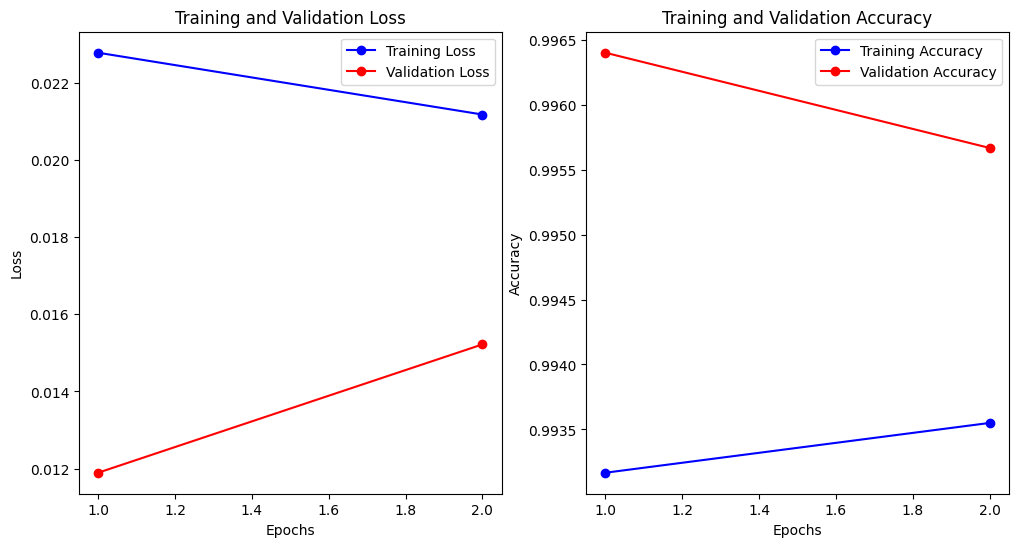

In [36]:
# Extract training history
history_dict = history.history

# Extract loss and accuracy for training and validation
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Task 07 - Conclusion:

The final model achieved an outstanding 99+% accuracy on the test set, demonstrating its ability to generalize well and classify images with high precision. The combination of a well-tuned architecture, effective regularization, and early stopping resulted in a model that not only performed exceptionally well on the training data but also showed remarkable performance on unseen test data.

Overall, the project successfully achieved its objectives, providing a deep understanding of CNNs and their applications in image classification. The impressive test accuracy is a testament to the power of deep learning and the effectiveness of the model's design and training process.

The project successfully demonstrated the power of deep learning in automating rice variety classification, achieving an impressive test accuracy of over 99%. This result highlights the effectiveness of Convolutional Neural Networks (CNNs) in handling complex image-based tasks. The developed model not only meets the industrial requirements for scalability and precision but also sets a benchmark for future implementations in agricultural processing. This solution is poised to significantly enhance efficiency, reduce costs, and improve product quality in real-world applications.

The End